In [4]:
import wapi
import pandas as pd
import datetime as dt
import plotly.graph_objects as go

In [5]:
config_file_path = './/configfile.ini'
session = wapi.Session(config_file=config_file_path)

In [6]:
curve = session.get_curve(name='pri de spot €/mwh cet h a')
ts = curve.get_data(data_from='2018-01-01T14:00Z', data_to='2022-02-01T14:00Z')

In [8]:
ts.to_pandas()

2018-01-01 15:00:00+01:00     0.23
2018-01-01 16:00:00+01:00    11.02
2018-01-01 17:00:00+01:00    23.50
2018-01-01 18:00:00+01:00    22.91
2018-01-01 19:00:00+01:00    21.02
                             ...  
2021-03-20 19:00:00+01:00    68.09
2021-03-20 20:00:00+01:00    59.94
2021-03-20 21:00:00+01:00    49.03
2021-03-20 22:00:00+01:00    48.92
2021-03-20 23:00:00+01:00    46.40
Freq: H, Name: pri de spot €/mwh cet h a, Length: 28185, dtype: float64

In [4]:
voluo_ids = {
    'solar': {
        'forecast': 'pro de spv ec00 mwh/h cet min15 f',
        'actual': 'pro de spv mwh/h cet min15 a',
        'normal': 'pro de spv mwh/h cet min15 n'
    }
}

In [3]:
voluo_ids['solar']['normal']

'pro de spv mwh/h cet min15 n'

<AxesSubplot:>

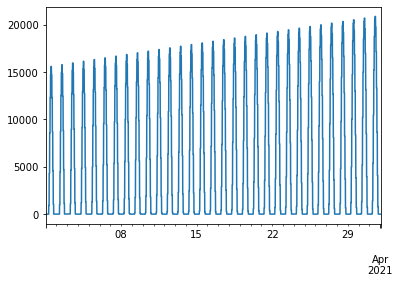

In [17]:
curve = session.get_curve(name=voluo_ids['solar']['forecast'])
ts = curve.get_data(data_from='2018-01-01T14:00Z', data_to='2022-02-01T14:00Z')
ts.to_pandas()

<AxesSubplot:>

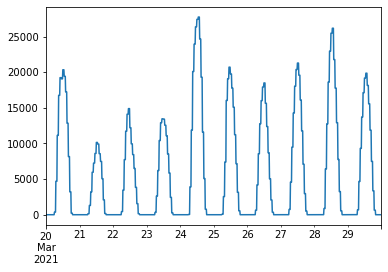

In [14]:
curve.get_latest().to_pandas().plot()

In [29]:
# def compare_to_nomral(energy_source):
forecast_curve = session.get_curve(name=voluo_ids['solar']['forecast'])
forecast = forecast_curve.get_latest().to_pandas()
forecast.name = 'forecast'
forecast_min_date, forecast_max_date = forecast.index.min(),  forecast.index.max()


nomral_curve = session.get_curve(name=voluo_ids['solar']['normal'])
normal_ts = nomral_curve.get_data(data_from=forecast_min_date, data_to=forecast_max_date)
normal = normal_ts.to_pandas()
normal.name = 'normal'


actual_curve = session.get_curve(name=voluo_ids['solar']['normal'])
actual_ts = actual_curve.get_data(data_from=forecast_min_date, data_to=forecast_max_date)
actual = actual_ts.to_pandas()
actual.name = 'actual'

df = pd.merge(forecast, normal, left_index=True, right_index=True)
df['diff'] = df['forecast'] - df['normal']

<AxesSubplot:>

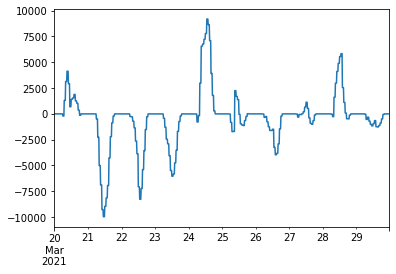

In [31]:
df['diff'].plot()

In [5]:
nomral = session.get_curve(name=voluo_ids['solar']['normal'])
normal_ts = nomral.get_data(data_from=forecast_min_date, data_to=forecast_max_date)
normal) = forecast_ts.to_pandas()

SyntaxError: unmatched ')' (<ipython-input-5-dd28e2d1e30c>, line 3)

<AxesSubplot:>

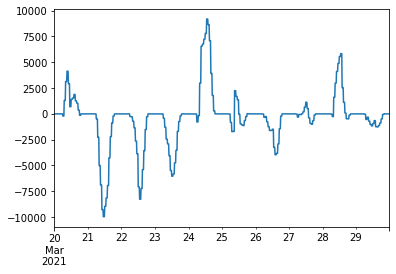

In [41]:
df['diff'].plot()

In [45]:
issues = forecast_curve.search_instances(issue_date_from='2020-03-15', issue_date_to='2020-03-20')

In [47]:
issues[1].to_pandas()

Series([], Name: pro de spv ec00 mwh/h cet min15 f 2020-03-18T00:00:00+01:00, dtype: float64)

In [24]:
actual_curve = session.get_curve(name=voluo_ids['solar']['actual'])
actual_ts = actual_curve.get_data(data_from='2017-01-01', data_to=dt.date.today())
actual = actual_ts.to_pandas()
actual.name = 'actual'
actual_min_date, actual_max_date = actual.index.min(), actual.index.max()

nomral_curve = session.get_curve(name=voluo_ids['solar']['normal'])
normal_ts = nomral_curve.get_data(data_from=actual_min_date, data_to=actual_max_date)
normal = normal_ts.to_pandas()
normal.name = 'normal'

df = pd.merge(actual, normal, left_index=True, right_index=True)
df['diff'] = df['actual'] - df['normal']

In [32]:
data = go.Scatter(x=df['diff'].index, y=df['diff'])
go.Figure(data)

In [36]:
mask = df['diff'] >= 0
fig = go.Figure(go.Scatter(x=df[mask].index, y=df[mask]['diff'], mode='lines',fill='tozeroy', fillcolor='green'))
fig.add_trace(go.Scatter(x=df[~mask].index, y=df[~mask]['diff'], mode='lines', fill='tozeroy', fillcolor='red'))
fig

In [35]:
df[mask]

,forecast,normal,diff
2021-03-20 00:00:00+01:00,0.0,0.0,0.0
2021-03-20 00:15:00+01:00,0.0,0.0,0.0
2021-03-20 00:30:00+01:00,0.0,0.0,0.0
2021-03-20 00:45:00+01:00,0.0,0.0,0.0
2021-03-20 01:00:00+01:00,0.0,0.0,0.0
...,...,...,...
2021-03-29 22:30:00+02:00,0.0,0.0,0.0
2021-03-29 22:45:00+02:00,0.0,0.0,0.0
2021-03-29 23:00:00+02:00,0.0,0.0,0.0
2021-03-29 23:15:00+02:00,0.0,0.0,0.0


In [75]:
data = go.Histogram(y=df['diff'], nbinsy=20, histnorm='probability',)
fig = go.Figure(data=data)
fig

In [38]:
import numpy as np
from scipy.stats import norm

In [53]:
mu, std = norm.fit(df['diff'])

In [40]:
mu

-321.20580022433745

In [42]:
std

2570.929801458082

In [44]:
norm.pdf()

TypeError: pdf() missing 1 required positional argument: 'x'

In [56]:
x = np.linspace(norm.ppf(0.01, loc=mu, scale=std), norm.ppf(0.99, loc=mu, scale=std), 100)

In [76]:
go.Figure(go.Scatter(y=x, x=norm.pdf(x, loc=mu, scale=std)))

In [77]:
norm.pdf(x, loc=mu, scale=std)

array([1.03667328e-05, 1.15516554e-05, 1.28436161e-05, 1.42485665e-05,
       1.57723281e-05, 1.74205235e-05, 1.91985031e-05, 2.11112672e-05,
       2.31633840e-05, 2.53589040e-05, 2.77012727e-05, 3.01932410e-05,
       3.28367762e-05, 3.56329733e-05, 3.85819683e-05, 4.16828559e-05,
       4.49336111e-05, 4.83310185e-05, 5.18706083e-05, 5.55466029e-05,
       5.93518739e-05, 6.32779114e-05, 6.73148071e-05, 7.14512521e-05,
       7.56745507e-05, 7.99706503e-05, 8.43241890e-05, 8.87185606e-05,
       9.31359975e-05, 9.75576706e-05, 1.01963807e-04, 1.06333824e-04,
       1.10646477e-04, 1.14880025e-04, 1.19012401e-04, 1.23021405e-04,
       1.26884893e-04, 1.30580979e-04, 1.34088241e-04, 1.37385923e-04,
       1.40454140e-04, 1.43274079e-04, 1.45828186e-04, 1.48100352e-04,
       1.50076080e-04, 1.51742639e-04, 1.53089201e-04, 1.54106959e-04,
       1.54789220e-04, 1.55131483e-04, 1.55131483e-04, 1.54789220e-04,
       1.54106959e-04, 1.53089201e-04, 1.51742639e-04, 1.50076080e-04,
      

In [101]:
df['tt']=(df['diff']-0).abs()>5000
df['tf']=df['tt'].shift()
df = df.dropna()

In [104]:
# fig.add_vrect(
#     x0="2015-02-04", x1="2015-02-06",
#     fillcolor="LightSalmon", opacity=0.5,
#     layer="below", line_width=0,
# ),

In [105]:
def check(tt, tf, pos):
    if tt and not(tf) and pos=='start':
        return True
    if tf and not(tt) and pos=='end':
        return True
    return False
df['start'] = df.apply(lambda x: check(x['tt'], x['tf'], 'start'), axis=1)
df['end'] = df.apply(lambda x: check(x['tt'], x['tf'], 'end'), axis=1)

In [119]:
to_highlight = pd.merge(
    df[df['start']].reset_index().rename(columns={'index': 'StartD'})['StartD'], 
    df[df['end']].reset_index().rename(columns={'index': 'EndD'})['EndD'],
    right_index=True,
    left_index=True
)

In [120]:
for th in  to_highlight.iterrows():
    print(th[1]['EndD'])

2021-03-21 15:00:00+01:00
2021-03-22 16:00:00+01:00
2021-03-23 14:00:00+01:00
2021-03-24 16:00:00+01:00
2021-03-28 14:00:00+02:00


In [68]:
# forcast_consumption

2021-03-20 18:15:00+01:00    59798.604142
2021-03-20 18:30:00+01:00    59798.604142
2021-03-20 18:45:00+01:00    59798.604142
2021-03-20 19:00:00+01:00    63544.579175
2021-03-20 19:15:00+01:00    63544.579175
2021-03-20 19:30:00+01:00    63544.579175
2021-03-20 19:45:00+01:00    63544.579175
2021-03-20 20:00:00+01:00    60193.086778
2021-03-20 20:15:00+01:00    60193.086778
2021-03-20 20:30:00+01:00    60193.086778
2021-03-20 20:45:00+01:00    60193.086778
2021-03-20 21:00:00+01:00    57691.550636
2021-03-20 21:15:00+01:00    57691.550636
2021-03-20 21:30:00+01:00    57691.550636
2021-03-20 21:45:00+01:00    57691.550636
2021-03-20 22:00:00+01:00    56871.300294
2021-03-20 22:15:00+01:00    56871.300294
2021-03-20 22:30:00+01:00    56871.300294
2021-03-20 22:45:00+01:00    56871.300294
2021-03-20 23:00:00+01:00    54775.522667
2021-03-20 23:15:00+01:00    54775.522667
2021-03-20 23:30:00+01:00    54775.522667
2021-03-20 23:45:00+01:00    54775.522667
2021-03-21 00:00:00+01:00    52352

In [71]:
actual_consumption = session.get_curve(name='con de mwh/h cet min15 a').get_data(data_from='2021-03-20T00:00Z', data_to='2021-03-21T00:00Z').to_pandas().rename('act')
forcast_consumption = session.get_curve(name='con de ec00 mwh/h cet min15 f').get_latest(data_from='2021-03-20T12:00Z').to_pandas().rename('fct')[:100]
forcast_consumption = pd.merge(forcast_consumption, actual_consumption, how='outer', left_index=True, right_index=True)
forcast_consumption = forcast_consumption[forcast_consumption['act'].isnull()]['fct']

production_dict = {
    'Nuc': {'actual': 'pro de nuc mwh/h cet h af', 'forecast': 'cap de nuc mw cet h af'},
    'Hydro': {'actual': 'pro de hydro tot mwh/h cet h af', 'forecast': 'pro de hydro tot mwh/h cet h af'},
    'Solar':  {'actual': 'pro de spv mwh/h cet min15 a', 'forecast': 'pro de spv ec00 mwh/h cet min15 f'},
    'Wind':  {'actual': 'pro de wnd mwh/h cet min15 a', 'forecast': 'pro de wnd ec00 mwh/h cet min15 f'},
    'Gas':  {'actual': 'pro de thermal gas mwh/h cet min15 a', 'forecast': 'cap de avail thermal gas mw cet h f'},
    'Lignite':  {'actual': 'pro de thermal lignite mwh/h cet min15 a', 'forecast': 'cap de avail thermal lignite mw cet h f'},
    'Coal': {'actual': 'pro de thermal coal mwh/h cet min15 a', 'forecast': 'cap de avail thermal coal mw cet h f'},
}

production = pd.DataFrame()
for source in production_dict.keys():
    df = session.get_curve(name=production_dict[source]['actual']).get_data(data_from='2021-03-20T00:00Z', data_to='2021-03-21T00:00Z').to_pandas()
    production = pd.concat([production, df.to_frame(source)], verify_integrity=True, axis=1)
production['Nuc'] = production['Nuc'].fillna(method='ffill')
production['Hydro'] = production['Hydro'].fillna(method='ffill')
production = production.dropna(subset=['Coal', 'Solar', 'Wind', 'Gas', 'Lignite'], how='all')

In [77]:
production_ft = pd.DataFrame()
for source in production_dict.keys():
    if source in ['Nuc', 'Hydro']:
        df = session.get_curve(name=production_dict[source]['forecast']).get_data(data_from='2021-03-20T00:00Z', data_to='2021-03-22T00:00Z').to_pandas()
    else:
        df = session.get_curve(name=production_dict[source]['forecast']).get_latest(data_from='2021-03-20T12:00Z').to_pandas()
    production_ft = pd.concat([production_ft, df.to_frame(source)], verify_integrity=True, axis=1)
production_ft = production_ft.fillna(method='ffill')[:100]

,Coal,Solar,Wind,Gas,Lignite
2021-03-20 00:00:00+01:00,13618.4,0.0,6846.794103,13626.6,12555.8
2021-03-20 00:15:00+01:00,13618.4,0.0,6846.794103,13626.6,12555.8
2021-03-20 00:30:00+01:00,13618.4,0.0,6846.794103,13626.6,12555.8
2021-03-20 00:45:00+01:00,13618.4,0.0,6846.794103,13626.6,12555.8
2021-03-20 01:00:00+01:00,13618.4,0.0,5694.754203,13626.6,12555.8
...,...,...,...,...,...
2021-03-20 23:45:00+01:00,13618.4,0.0,22560.703972,13626.6,12555.8
2021-03-21 00:00:00+01:00,13826.1,0.0,24073.241504,13684.1,13686.3
2021-03-21 00:15:00+01:00,13826.1,0.0,24073.241504,13684.1,13686.3
2021-03-21 00:30:00+01:00,13826.1,0.0,24073.241504,13684.1,13686.3


In [78]:
layout = {
    'barmode': 'stack'
}
data = [
    go.Scatter(x=actual_consumption.index, y=actual_consumption, name='Consumption', line={'color': px.colors.qualitative.Plotly[0]}),
    go.Scatter(x=forcast_consumption.index, y=forcast_consumption, name='Consumption (f)', line={'dash': 'dash', 'color': px.colors.qualitative.Plotly[0]}, showlegend=False),
]

for i, col in enumerate(production.columns):
    trace = go.Bar(
        x=production.index, 
        y=production[col], 
        name='Production {}'.format(col),
        marker_color=px.colors.qualitative.Plotly[i]
    )
    data.append(trace)

    fct = pd.merge(production_ft[col], production[col], how='outer', left_index=True, right_index=True, suffixes=('_f', '_a'))
    fct = fct[fct[col+'_a'].isnull()][col+'_f']
    trace = go.Bar(
        x=fct.index, 
        y=fct, 
        name='Production {}'.format(col),
        marker_color=px.colors.qualitative.Plotly[i],
        opacity=0.3,
        showlegend=False
    )
    data.append(trace)


go.Figure(data=data, layout=layout)

In [90]:
s = session.get_curve(name=production_dict['Solar']['forecast']).search_instances(issue_date_from='2021-03-18T00:00Z', issue_date_to='2021-03-21T00:00Z')
s

[<wapi.util.TS at 0x1d3ff1e7130>, <wapi.util.TS at 0x1d3ff879610>]

In [93]:
import plotly.express as px
import numpy as np

In [249]:
import wapi
import pandas as pd
import matplotlib.pyplot as plt


region = 'de'
source = 'spv'
sources = {
    'spv': 'Solar',
    'wnd': 'Wind'
}

concerned_runs = [pd.Timestamp.now().floor('6H') - pd.Timedelta(hours=6*i) for i in range(2,5)]

layout = {
    'title': sources[source],
    'showlegend': True,
    'hovermode': 'x',
    'spikedistance': -1,
    'xaxis': {
        'showspikes': True,
        'spikemode': 'across',
        'spikesnap': 'cursor',
        'showline': True,
        'showgrid': True,
    }
}
fig = go.Figure(layout=layout)
subs = make_subplots(
    rows=2,
    cols=1,
    figure=fig
)

subs.add_trace(go.Scatter(x=pv.index, y=pv, mode='lines+markers', line={'color': 'black'}, name='Actuals'), row=1, col=1)

for concerned_run_i, concerned_run in enumerate(concerned_runs):
    issue_date = concerned_run.floor('D')
    run_hour = str(concerned_run.hour).zfill(2)

    ## Get PV actuals

    curve_name = 'pro ' + region + ' {} mwh/h cet min15 a'.format(source)
    pv = session.get_curve(name=curve_name).get_data(data_from=yesterday).to_pandas()

    ## Get EC00 PV forecast data
    curve_name = 'pro ' + region + ' {} ec{} mwh/h cet min15 f'.format(source, run_hour)
    ec00  = session.get_curve(name=curve_name).get_instance(issue_date=issue_date).to_pandas()
    ec00 = ec00.loc[pv.index]


    # GFS00 PV forecast
    curve_name = 'pro ' + region + ' {} gfs{} mwh/h cet min15 f'.format(source, run_hour)
    gfs00 = session.get_curve(name=curve_name).get_instance(issue_date=issue_date).to_pandas()
    gfs00 = gfs00.loc[pv.index]


    curve_name = 'pro ' + region + ' {} icon{} mwh/h cet min15 f'.format(source, run_hour)
    icon00 = session.get_curve(name=curve_name).get_instance(issue_date=issue_date).to_pandas()
    icon00 = icon00[(icon00.index<=pv.index.max()) & (icon00.index>=pv.index.min())]

    

   

    dash = None if concerned_run_i==0 else 'dash'
    showlegend = True if concerned_run_i==0 else False
    add_to_name = concerned_run.strftime(' (%Y-%m-%d %H:00)') if concerned_run_i!=0 else ''
    
    subs.add_trace(go.Scatter(x=ec00.index, y=ec00, line={'color': px.colors.sequential.Reds[8-2*concerned_run_i-1], 'dash': dash}, name='EC{}'.format(add_to_name), showlegend=showlegend), row=1, col=1)
    subs.add_trace(go.Scatter(x=gfs00.index, y=gfs00, line={'color': px.colors.sequential.Greens[8-2*concerned_run_i-1], 'dash': dash}, name='GFS{}'.format(add_to_name), showlegend=showlegend), row=1, col=1)
    subs.add_trace(go.Scatter(x=icon00.index, y=icon00, line={'color': px.colors.sequential.Blues[8-2*concerned_run_i-1], 'dash': dash}, name='ICON{}'.format(add_to_name), showlegend=showlegend), row=1, col=1)

subs.add_trace(go.Box(y=(pv.values - ec00.values), name='EC', marker_color = px.colors.sequential.Reds[7], showlegend=False), row=2, col=1)
subs.add_trace(go.Box(y=(pv.values - gfs00.values), name = 'GFS', marker_color = px.colors.sequential.Greens[7], showlegend=False), row=2, col=1)
subs.add_trace(go.Box(y=(icon00 - pv).dropna(), name = 'ICON', marker_color = px.colors.sequential.Blues[7], showlegend=False), row=2, col=1)

fig.show()